In [1]:
!pip install seaborn


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [2]:
# Download:
import urllib.request
import os
import zipfile

# URL do dataset
url = "https://files.grouplens.org/datasets/movielens/ml-100k.zip"
# Diretório para salvar o dataset
data_dir = "data"
# Caminho completo para o arquivo zip
zip_path = os.path.join(data_dir, "ml-100k.zip")

# Criar diretório se não existir
if not os.path.exists(data_dir):
    os.makedirs(data_dir)

# Baixar o dataset
if not os.path.exists(zip_path):
    urllib.request.urlretrieve(url, zip_path)

# Extrair o arquivo zip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(data_dir)

print(f"Dataset extraído em {data_dir}/ml-100k/")

Dataset extraído em data/ml-100k/


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurando o estilo dos gráficos
plt.style.use('seaborn-v0_8-darkgrid')
sns.set(font_scale=1.2)

# Definindo caminhos para os arquivos
DATA_PATH = './data/ml-100k/'

# Carregando os dados de avaliações
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
ratings = pd.read_csv(DATA_PATH + 'u.data', sep='\t', names=column_names)

# Carregando informações dos filmes
movie_columns = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']
genre_columns = ['unknown', 'Action', 'Adventure', 'Animation', 'Children', 
                 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 
                 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 
                 'Sci-Fi', 'Thriller', 'War', 'Western']
all_columns = movie_columns + genre_columns

movies = pd.read_csv(DATA_PATH + 'u.item', sep='|', names=all_columns, encoding='ISO-8859-1')

# Carregando informações dos usuários
user_columns = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
users = pd.read_csv(DATA_PATH + 'u.user', sep='|', names=user_columns)

In [4]:
# Estatísticas descritivas das avaliações
print(ratings['rating'].describe())

count    100000.000000
mean          3.529860
std           1.125674
min           1.000000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64


In [5]:
plt.style.use('seaborn-v0_8-darkgrid')
sns.set(font_scale=0.8)
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

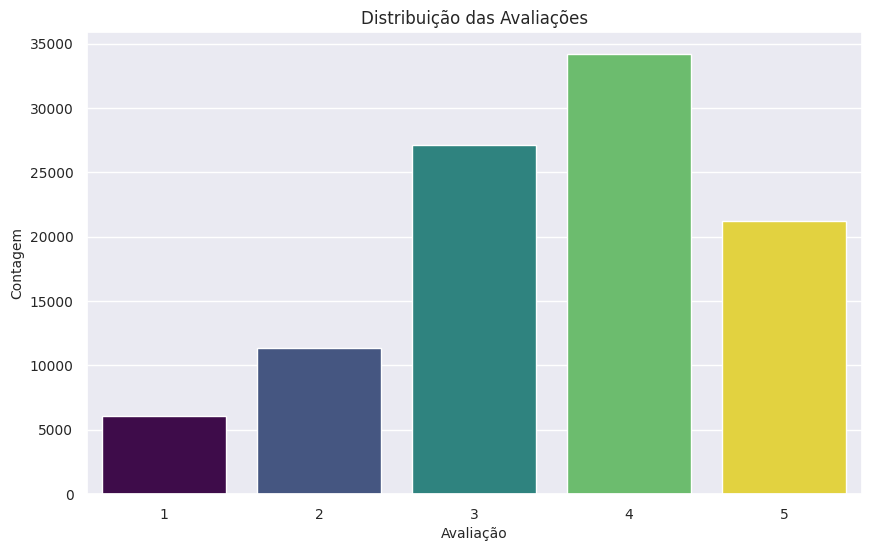

In [6]:
sns.countplot(data=ratings, x='rating', hue='rating', palette='viridis', legend=False)
_ = plt.title('Distribuição das Avaliações'), plt.xlabel('Avaliação'), plt.ylabel('Contagem')

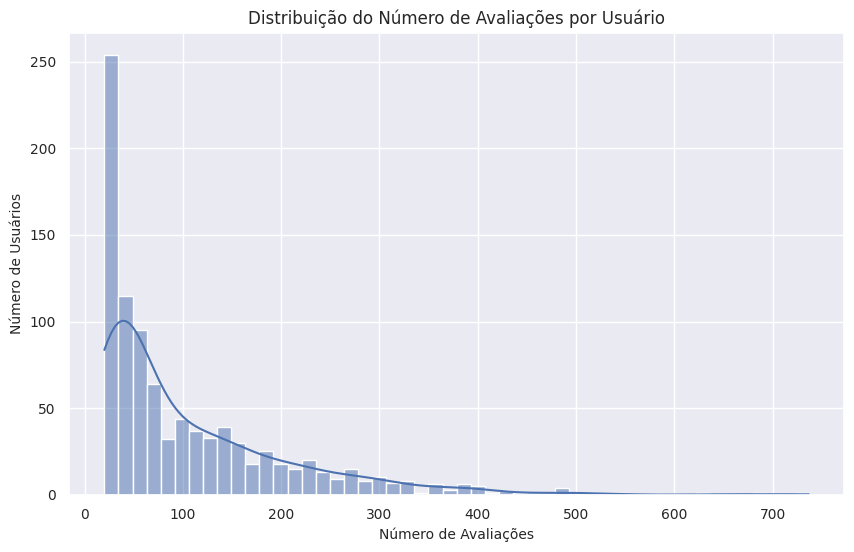

In [8]:
# Número de avaliações por usuário
user_ratings_count = ratings.groupby('user_id').size()
sns.histplot(user_ratings_count, bins=50, kde=True)
_ = plt.title('Distribuição do Número de Avaliações por Usuário'), plt.xlabel('Número de Avaliações'), plt.ylabel('Número de Usuários')

[(405, 737), (655, 685), (13, 636), (450, 540), (276, 518), (416, 493), (537, 490), (303, 484), (234, 480), (393, 448)]
[737 685 636 540 518 493 490 484 480 448]


(array([560., 183.,  96.,  55.,  25.,  15.,   5.,   1.,   1.,   2.]),
 array([ 20. ,  91.7, 163.4, 235.1, 306.8, 378.5, 450.2, 521.9, 593.6,
        665.3, 737. ]),
 <BarContainer object of 10 artists>)

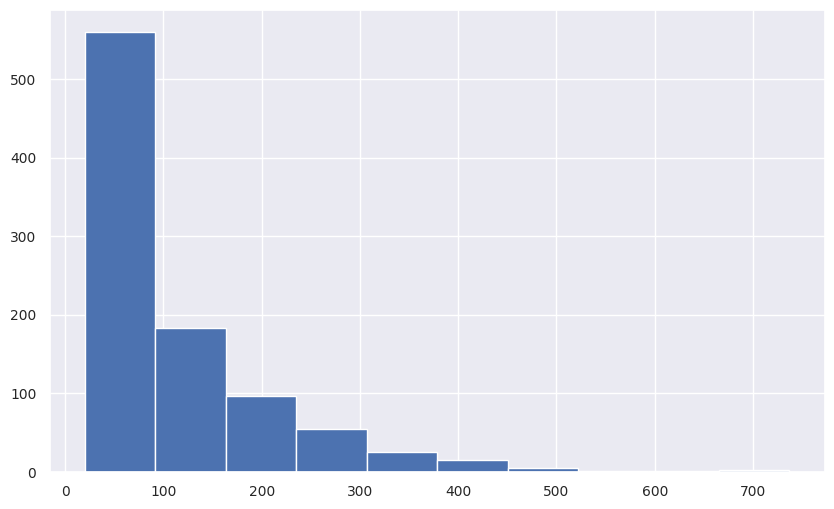

In [9]:
from collections import Counter
a = Counter(ratings['user_id'])
print(a.most_common(10))
b = np.sort(ratings.groupby('user_id').size())
print(b[::-1][:10])
plt.hist(b[::-1])

_ Dados ________________________________
        user_id  item_id  rating
0          196      242       3
1          186      302       3
2           22      377       1
3          244       51       2
4          166      346       1
...        ...      ...     ...
99995      880      476       3
99996      716      204       5
99997      276     1090       1
99998       13      225       2
99999       12      203       3

[100000 rows x 3 columns] 
________________________________________

Counter, most common......: [(405, 737), (655, 685), (13, 636), (450, 540), (276, 518)]
Pandas, group by "user_id": [737 685 636 540 518]


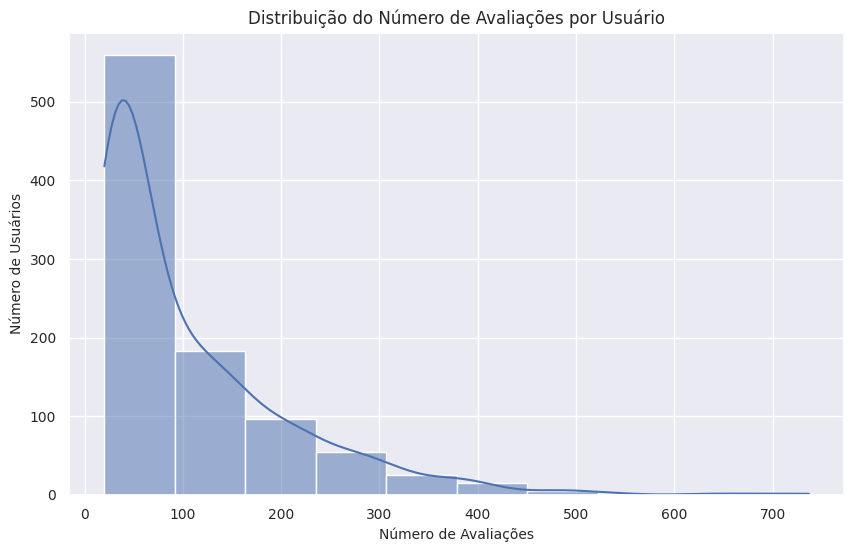

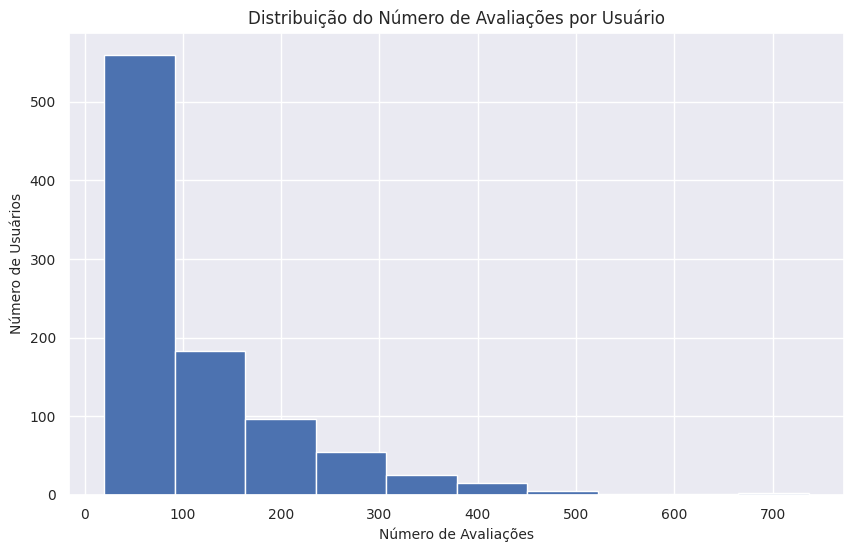

In [10]:
from collections import Counter
a = Counter(ratings['user_id'])
b = ratings.groupby('user_id')
c = np.sort( b.size().to_numpy() )
plot_labels = lambda: (plt.title('Distribuição do Número de Avaliações por Usuário'), plt.xlabel('Número de Avaliações'), plt.ylabel('Número de Usuários'))
print(f'_ Dados {"_"*(40-8)}\n', ratings[['user_id', 'item_id', 'rating']], f'\n{"_"*40}\n')
print('Counter, most common......:', a.most_common(5))
print('Pandas, group by "user_id":', c[::-1][:5])
sns.histplot(c, bins=10, kde=True)
_=plot_labels()
plt.figure(),
plt.hist(c[::-1])
_=plot_labels()

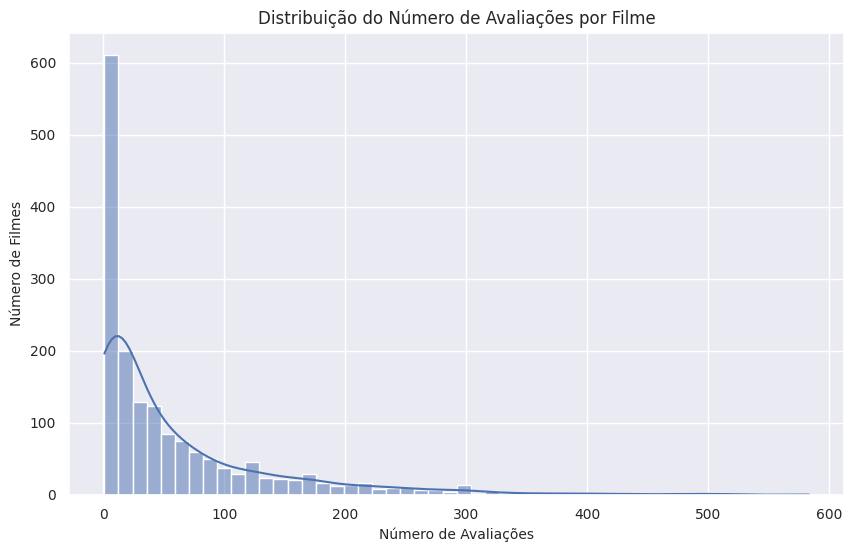

In [11]:
# Número de avaliações por filme
movie_ratings_count = ratings.groupby('item_id').size()
sns.histplot(movie_ratings_count, bins=50, kde=True)
_ = plt.title('Distribuição do Número de Avaliações por Filme'), plt.xlabel('Número de Avaliações'), plt.ylabel('Número de Filmes')

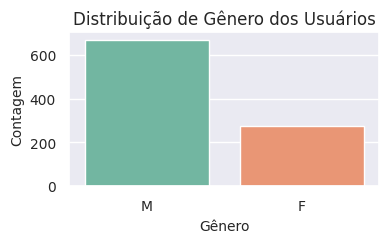

In [12]:
# Distribuição de gênero dos usuários
plt.figure(figsize=(4, 2))
sns.countplot(x='gender', hue='gender', data=users, palette='Set2')
_ = plt.title('Distribuição de Gênero dos Usuários'), plt.xlabel('Gênero'), plt.ylabel('Contagem')

Text(0, 0.5, 'Contagem')

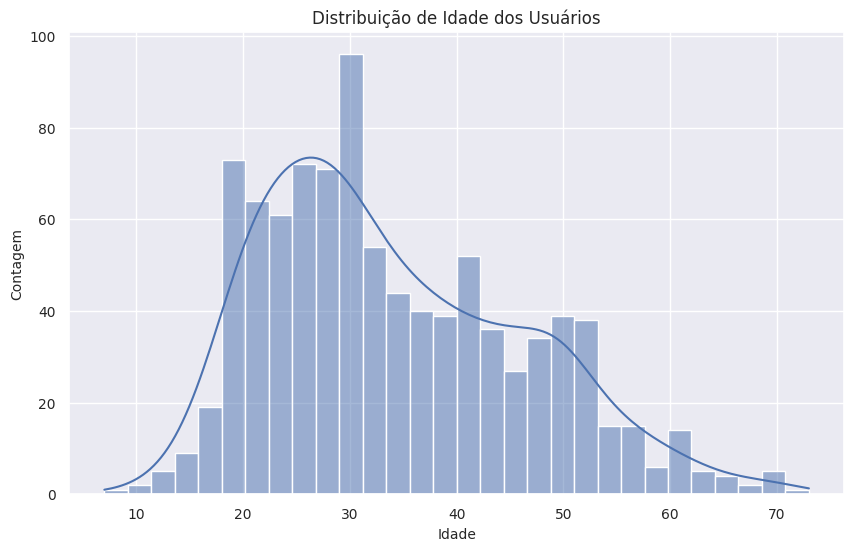

In [13]:
# Distribuição de idade dos usuários
sns.histplot(users['age'], bins=30, kde=True)
plt.title('Distribuição de Idade dos Usuários')
plt.xlabel('Idade')
plt.ylabel('Contagem')

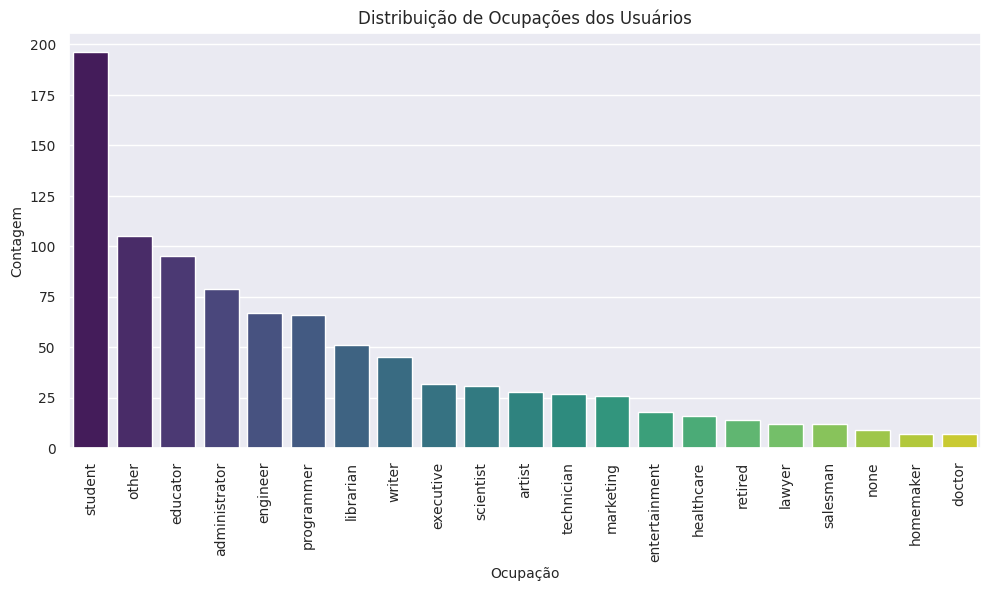

In [14]:
# Distribuição de ocupações dos usuários
occupation_counts = users['occupation'].value_counts()
sns.barplot(x=occupation_counts.index, y=occupation_counts.values, hue=occupation_counts.index, palette='viridis', legend=False)
plt.title('Distribuição de Ocupações dos Usuários')
plt.xlabel('Ocupação')
plt.ylabel('Contagem')
plt.xticks(rotation=90)
plt.tight_layout()

/tmp/ipykernel_70192/3030024994.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')


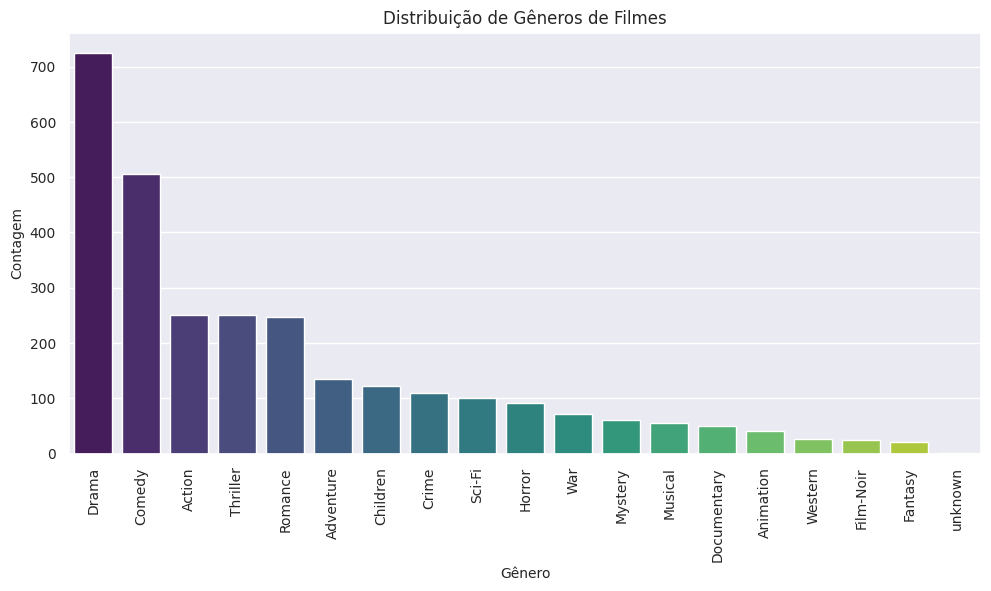

In [15]:
# Análise dos gêneros de filmes
genre_counts = movies[genre_columns].sum().sort_values(ascending=False)
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.title('Distribuição de Gêneros de Filmes')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.xticks(rotation=90)
plt.tight_layout()

In [16]:
### Matriz de Feedback
# Criando uma matriz de usuários x filmes
user_movie_matrix = ratings.pivot(index='user_id', columns='item_id', values='rating').fillna(0)
print(user_movie_matrix)

item_id  1     2     3     4     5     6     7     8     9     10    ...  \
user_id                                                              ...   
1         5.0   3.0   4.0   3.0   3.0   5.0   4.0   1.0   5.0   3.0  ...   
2         4.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   2.0  ...   
3         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
4         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
5         4.0   3.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
...       ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
939       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   5.0   0.0  ...   
940       0.0   0.0   0.0   2.0   0.0   0.0   4.0   5.0   3.0   0.0  ...   
941       5.0   0.0   0.0   0.0   0.0   0.0   4.0   0.0   0.0   0.0  ...   
942       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
943       0.0   5.0   0.0   0.0   0.0   0.0   0.0   0.0   3.0   0.0  ...   

item_id  16

In [17]:
# Convertendo para matriz esparsa
from scipy.sparse import csr_matrix
user_movie_sparse = csr_matrix(user_movie_matrix.values)
print(user_movie_sparse)

  (0, 0)	5.0
  (0, 1)	3.0
  (0, 2)	4.0
  (0, 3)	3.0
  (0, 4)	3.0
  (0, 5)	5.0
  (0, 6)	4.0
  (0, 7)	1.0
  (0, 8)	5.0
  (0, 9)	3.0
  (0, 10)	2.0
  (0, 11)	5.0
  (0, 12)	5.0
  (0, 13)	5.0
  (0, 14)	5.0
  (0, 15)	5.0
  (0, 16)	3.0
  (0, 17)	4.0
  (0, 18)	5.0
  (0, 19)	4.0
  (0, 20)	1.0
  (0, 21)	4.0
  (0, 22)	4.0
  (0, 23)	3.0
  (0, 24)	4.0
  :	:
  (942, 738)	4.0
  (942, 755)	2.0
  (942, 762)	4.0
  (942, 764)	3.0
  (942, 784)	2.0
  (942, 793)	3.0
  (942, 795)	3.0
  (942, 807)	4.0
  (942, 815)	4.0
  (942, 823)	4.0
  (942, 824)	3.0
  (942, 830)	2.0
  (942, 839)	4.0
  (942, 927)	5.0
  (942, 940)	1.0
  (942, 942)	5.0
  (942, 1010)	2.0
  (942, 1027)	2.0
  (942, 1043)	3.0
  (942, 1046)	2.0
  (942, 1066)	2.0
  (942, 1073)	4.0
  (942, 1187)	3.0
  (942, 1227)	3.0
  (942, 1329)	3.0


In [18]:
from torch import nn

class NCF(nn.Module):
    """
    Neural Collaborative Filtering (NCF)
    
    Implementa um modelo híbrido que combina:
    1. Filtragem colaborativa baseada em matriz de fatores (MF)
    2. Redes neurais multicamadas (MLP)
    """
    def __init__(self, num_users, num_items, embedding_size=50, mlp_layers=[100, 50], dropout=0.2):
        super(NCF, self).__init__()
        
        # Camada de embedding para usuários e itens (parte MF)
        self.user_embedding_mf = nn.Embedding(num_users, embedding_size)
        self.item_embedding_mf = nn.Embedding(num_items, embedding_size)
        
        # Camada de embedding para usuários e itens (parte MLP)
        self.user_embedding_mlp = nn.Embedding(num_users, embedding_size)
        self.item_embedding_mlp = nn.Embedding(num_items, embedding_size)
        
        # Camadas MLP
        self.mlp_layers = nn.ModuleList()
        input_size = 2 * embedding_size  # Concatenação dos embeddings de usuário e item
        
        # Construindo as camadas MLP
        for i, layer_size in enumerate(mlp_layers):
            if i == 0:
                self.mlp_layers.append(nn.Linear(input_size, layer_size))
            else:
                self.mlp_layers.append(nn.Linear(mlp_layers[i-1], layer_size))
            self.mlp_layers.append(nn.ReLU())
            self.mlp_layers.append(nn.Dropout(dropout))
        
        # Camada de saída que combina MF e MLP
        self.output_layer = nn.Linear(embedding_size + mlp_layers[-1], 1)
        
        # Inicialização dos pesos
        self._init_weights()
    
    def _init_weights(self):
        """Inicializa os pesos do modelo usando a distribuição normal."""
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, mean=0.0, std=0.01)
                if m.bias is not None:
                    nn.init.zeros_(m.bias)
            elif isinstance(m, nn.Embedding):
                nn.init.normal_(m.weight, mean=0.0, std=0.01)
    
    def forward(self, user_indices, item_indices):
        # Embeddings para parte MF
        user_embedding_mf = self.user_embedding_mf(user_indices)
        item_embedding_mf = self.item_embedding_mf(item_indices)
        mf_vector = user_embedding_mf * item_embedding_mf  # Produto elemento a elemento
        
        # Embeddings para parte MLP
        user_embedding_mlp = self.user_embedding_mlp(user_indices)
        item_embedding_mlp = self.item_embedding_mlp(item_indices)
        mlp_vector = torch.cat([user_embedding_mlp, item_embedding_mlp], dim=-1)
        
        # Passando pela rede MLP
        for layer in self.mlp_layers:
            mlp_vector = layer(mlp_vector)
        
        # Concatenando os resultados de MF e MLP
        vector = torch.cat([mf_vector, mlp_vector], dim=-1)
        
        # Camada de saída
        rating = self.output_layer(vector)
        
        return rating.squeeze()

In [19]:
# Criando mapeamento de IDs para índices contínuos (0 a n-1)
user_id_map = {id: i for i, id in enumerate(ratings['user_id'].unique())}
item_id_map = {id: i for i, id in enumerate(ratings['item_id'].unique())}

# Aplicando o mapeamento
ratings['user_idx'] = ratings['user_id'].map(user_id_map)
ratings['item_idx'] = ratings['item_id'].map(item_id_map)

In [21]:
# Dividindo os dados em treino e teste (80% treino, 20% teste)
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(ratings, test_size=0.2, random_state=42, stratify=ratings['rating'])
print(train_data.groupby('rating').size())
print(test_data.groupby('rating').size())

rating
1     4888
2     9096
3    21716
4    27339
5    16961
dtype: int64
rating
1    1222
2    2274
3    5429
4    6835
5    4240
dtype: int64


In [22]:
from torch.utils.data import Dataset
class MovieLensDataset(Dataset):
    def __init__(self, ratings_df):
        self.ratings_df = ratings_df
        
    def __len__(self):
        return len(self.ratings_df)
    
    def __getitem__(self, idx):
        user = self.ratings_df.iloc[idx]['user_idx']
        item = self.ratings_df.iloc[idx]['item_idx']
        rating = self.ratings_df.iloc[idx]['rating']
        
        return {
            'user': torch.tensor(user, dtype=torch.long),
            'item': torch.tensor(item, dtype=torch.long),
            'rating': torch.tensor(rating, dtype=torch.float)
        }

In [23]:
from torch.utils.data import DataLoader

# Criando os datasets e dataloaders
train_dataset = MovieLensDataset(train_data)
test_dataset = MovieLensDataset(test_data)

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [24]:
def train_model(model, train_loader, criterion, optimizer, device, epoch):
    model.train()
    running_loss = 0.0
    
    for batch in train_loader:
        user = batch['user'].to(device)
        item = batch['item'].to(device)
        rating = batch['rating'].to(device)
        
        # Zerando os gradientes
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(user, item)
        loss = criterion(outputs, rating)
        
        # Backward pass e otimização
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * user.size(0)
    
    epoch_loss = running_loss / len(train_loader.dataset)
    return epoch_loss

In [25]:
def evaluate_model(model, test_loader, criterion, device):
    model.eval()
    running_loss = 0.0
    
    with torch.no_grad():
        for batch in test_loader:
            user = batch['user'].to(device)
            item = batch['item'].to(device)
            rating = batch['rating'].to(device)
            
            outputs = model(user, item)
            loss = criterion(outputs, rating)
            
            running_loss += loss.item() * user.size(0)
    
    test_loss = running_loss / len(test_loader.dataset)
    return test_loss

In [28]:
import torch
# Verificando se GPU está disponível
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Usando dispositivo: {device}")

num_users = len(user_id_map)
num_items = len(item_id_map)

# Criando o modelo
embedding_size = 16
mlp_layers = [32, 8]
model = NCF(num_users, num_items, embedding_size, mlp_layers, 0.4)
print(model)
model = model.to(device)

from torch import optim
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)

Usando dispositivo: cuda
NCF(
  (user_embedding_mf): Embedding(943, 16)
  (item_embedding_mf): Embedding(1682, 16)
  (user_embedding_mlp): Embedding(943, 16)
  (item_embedding_mlp): Embedding(1682, 16)
  (mlp_layers): ModuleList(
    (0): Linear(in_features=32, out_features=32, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.4, inplace=False)
    (3): Linear(in_features=32, out_features=8, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.4, inplace=False)
  )
  (output_layer): Linear(in_features=24, out_features=1, bias=True)
)


In [29]:
# Treinando o modelo
num_epochs = 10
train_losses = []
test_losses = []

print("Iniciando treinamento...")
for epoch in range(num_epochs):
    train_loss = train_model(model, train_loader, criterion, optimizer, device, epoch)
    test_loss = evaluate_model(model, test_loader, criterion, device)
    
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    
    print(f"Época {epoch+1}/{num_epochs}, Perda Treino: {train_loss:.4f}, Perda Teste: {test_loss:.4f}")

# Salvando o modelo treinado
torch.save(model.state_dict(), 'modelo_ncf.pth')

Iniciando treinamento...
Época 1/10, Perda Treino: 3.1547, Perda Teste: 1.0329
Época 2/10, Perda Treino: 1.4403, Perda Teste: 0.9470
Época 3/10, Perda Treino: 1.0003, Perda Teste: 0.8885
Época 4/10, Perda Treino: 0.8578, Perda Teste: 0.8640
Época 5/10, Perda Treino: 0.8068, Perda Teste: 0.8516
Época 6/10, Perda Treino: 0.7762, Perda Teste: 0.8467
Época 7/10, Perda Treino: 0.7540, Perda Teste: 0.8422
Época 8/10, Perda Treino: 0.7300, Perda Teste: 0.8464
Época 9/10, Perda Treino: 0.7037, Perda Teste: 0.8510
Época 10/10, Perda Treino: 0.6767, Perda Teste: 0.8548


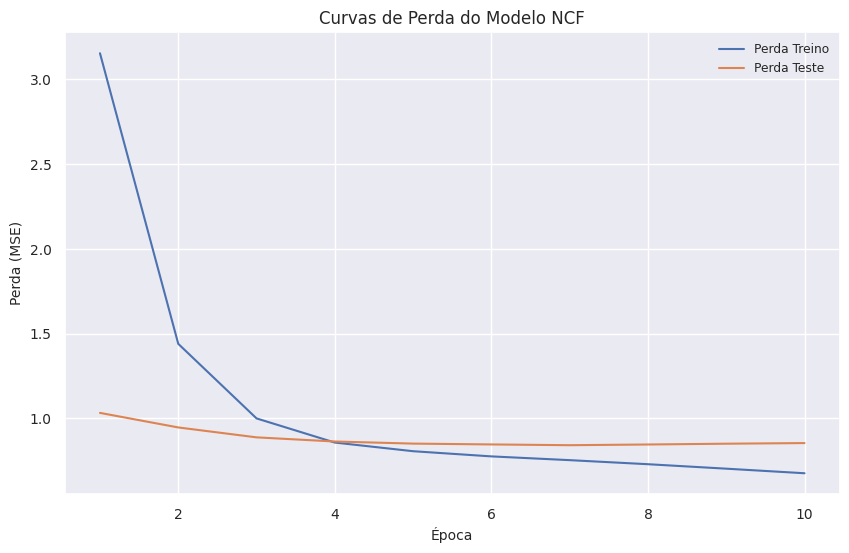

In [30]:
# Plotando as curvas de perda
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs+1), train_losses, label='Perda Treino')
plt.plot(range(1, num_epochs+1), test_losses, label='Perda Teste')
plt.xlabel('Época')
plt.ylabel('Perda (MSE)')
plt.title('Curvas de Perda do Modelo NCF')
plt.legend()
plt.grid(True)

In [31]:
def recommend_movies(model, user_id, ratings_df, user_id_map, item_id_map, top_n=10):
    model.eval()
    
    # Obtendo o índice do usuário
    user_idx = user_id_map[user_id]
    
    # Filmes já avaliados pelo usuário
    user_rated_items = set(ratings_df[ratings_df['user_id'] == user_id]['item_id'].values)
    
    # Filmes não avaliados pelo usuário
    all_items = set(ratings_df['item_id'].unique())
    unrated_items = list(all_items - user_rated_items)
    
    # Convertendo para índices
    unrated_items_idx = [item_id_map[item] for item in unrated_items]
    
    # Preparando os dados para predição
    user_tensor = torch.tensor([user_idx] * len(unrated_items_idx), dtype=torch.long).to(device)
    item_tensor = torch.tensor(unrated_items_idx, dtype=torch.long).to(device)
    
    # Fazendo a predição
    with torch.no_grad():
        predictions = model(user_tensor, item_tensor)
    
    # Obtendo os top-n filmes recomendados
    _, indices = torch.topk(predictions, top_n)
    recommended_item_idx = [unrated_items_idx[idx] for idx in indices.cpu().numpy()]
    
    # Convertendo de volta para os IDs originais
    reverse_item_map = {v: k for k, v in item_id_map.items()}
    recommended_items = [reverse_item_map[idx] for idx in recommended_item_idx]
    
    return recommended_items

In [32]:
# Carregando informações dos filmes para exibir os títulos
movie_columns = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']
genre_columns = ['unknown', 'Action', 'Adventure', 'Animation', 'Children', 
                 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 
                 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 
                 'Sci-Fi', 'Thriller', 'War', 'Western']
all_columns = movie_columns + genre_columns

movies = pd.read_csv(DATA_PATH + 'u.item', sep='|', names=all_columns, encoding='ISO-8859-1')

# Exemplo de recomendação para um usuário
user_id = 1  # Usuário de exemplo
recommended_items = recommend_movies(model, user_id, ratings, user_id_map, item_id_map, top_n=10)

print(f"\nRecomendações para o usuário {user_id}:")
for i, item_id in enumerate(recommended_items):
    movie_title = movies[movies['movie_id'] == item_id]['title'].values[0]
    print(f"{i+1}. {movie_title}")


Recomendações para o usuário 1:
1. Pather Panchali (1955)
2. Secrets & Lies (1996)
3. Faust (1994)
4. Lawrence of Arabia (1962)
5. L.A. Confidential (1997)
6. Close Shave, A (1995)
7. Crooklyn (1994)
8. Schindler's List (1993)
9. Casablanca (1942)
10. To Kill a Mockingbird (1962)


In [33]:
# Função para recomendar filmes para um usuário
def recommend_movies(model, user_id, ratings_df, user_id_map, item_id_map, movies_df, top_n=10):
    model.eval()
    
    # Obtendo o índice do usuário
    user_idx = user_id_map[user_id]
    
    # Filmes já avaliados pelo usuário
    user_rated_items = set(ratings_df[ratings_df['user_id'] == user_id]['item_id'].values)
    
    # Filmes não avaliados pelo usuário
    all_items = set(ratings_df['item_id'].unique())
    unrated_items = list(all_items - user_rated_items)
    
    # Convertendo para índices
    unrated_items_idx = [item_id_map[item] for item in unrated_items]
    
    # Preparando os dados para predição
    user_tensor = torch.tensor([user_idx] * len(unrated_items_idx), dtype=torch.long).to(device)
    item_tensor = torch.tensor(unrated_items_idx, dtype=torch.long).to(device)
    
    # Fazendo a predição
    with torch.no_grad():
        predictions = model(user_tensor, item_tensor)
    
    # Obtendo os top-n filmes recomendados
    _, indices = torch.topk(predictions, top_n)
    recommended_item_idx = [unrated_items_idx[idx] for idx in indices.cpu().numpy()]
    
    # Convertendo de volta para os IDs originais
    reverse_item_map = {v: k for k, v in item_id_map.items()}
    recommended_items = [reverse_item_map[idx] for idx in recommended_item_idx]
    
    # Obtendo os títulos dos filmes
    recommended_titles = []
    for item_id in recommended_items:
        title = movies_df[movies_df['movie_id'] == item_id]['title'].values[0]
        recommended_titles.append(title)
    
    return recommended_items, recommended_titles

In [34]:
# Exemplo de geração de recomendações para um usuário existente
user_id = 200  # ID do usuário para o qual queremos gerar recomendações
_, recommended_titles = recommend_movies(model, user_id, ratings, user_id_map, item_id_map, movies, top_n=10)

print(f"Recomendações para o usuário {user_id}:")
for i, title in enumerate(recommended_titles):
    print(f"{i+1}. {title}")


Recomendações para o usuário 200:
1. Return of the Jedi (1983)
2. Good Will Hunting (1997)
3. Fresh (1994)
4. Affair to Remember, An (1957)
5. Santa with Muscles (1996)
6. Love in the Afternoon (1957)
7. Leading Man, The (1996)
8. Saint of Fort Washington, The (1993)
9. Searching for Bobby Fischer (1993)
10. Shawshank Redemption, The (1994)


In [35]:
# Comparando recomendações para dois usuários diferentes
user_ids = [100, 400]
for user_id in user_ids:
    _, recommended_titles = recommend_movies(model, user_id, ratings, user_id_map, item_id_map, movies, top_n=5)
    
    print(f"\nTop 5 recomendações para o usuário {user_id}:")
    for i, title in enumerate(recommended_titles[:5]):
        print(f"{i+1}. {title}")


Top 5 recomendações para o usuário 100:
1. Braveheart (1995)
2. Empire Strikes Back, The (1980)
3. It's a Wonderful Life (1946)
4. Casablanca (1942)
5. Shawshank Redemption, The (1994)

Top 5 recomendações para o usuário 400:
1. Pather Panchali (1955)
2. Faust (1994)
3. Santa with Muscles (1996)
4. Saint of Fort Washington, The (1993)
5. Schindler's List (1993)


In [36]:
# Analisando os gêneros dos filmes recomendados para um usuário
user_id = 300
recommended_items, _ = recommend_movies(model, user_id, ratings, user_id_map, item_id_map, movies, top_n=10)

# Contando os gêneros dos filmes recomendados
genre_counts = {genre: 0 for genre in genre_columns}
for item_id in recommended_items:
    movie_row = movies[movies['movie_id'] == item_id].iloc[0]
    for genre in genre_columns:
        if movie_row[genre] == 1:
            genre_counts[genre] += 1

# Exibindo os gêneros mais frequentes
sorted_genres = sorted([(genre, count) for genre, count in genre_counts.items() if count > 0], 
                       key=lambda x: x[1], reverse=True)
print(f"\nGêneros mais frequentes nas recomendações para o usuário {user_id}:")
for genre, count in sorted_genres[:5]:
    print(f"{genre}: {count} filmes")


Gêneros mais frequentes nas recomendações para o usuário 300:
Drama: 4 filmes
Action: 3 filmes
Romance: 3 filmes
Adventure: 2 filmes
Animation: 1 filmes


In [37]:
# Exemplo de explicação para uma recomendação
def explain_recommendation(user_id, item_id, ratings_df, movies_df):
    # Filmes avaliados pelo usuário com alta pontuação (4 ou 5)
    liked_items = ratings_df[(ratings_df['user_id'] == user_id) & (ratings_df['rating'] >= 4)]['item_id'].values
    
    # Obtendo gêneros do filme recomendado
    recommended_movie = movies_df[movies_df['movie_id'] == item_id].iloc[0]
    recommended_genres = [genre for genre in genre_columns if recommended_movie[genre] == 1]
    
    # Contando gêneros nos filmes que o usuário gostou
    genre_counts = {genre: 0 for genre in genre_columns}
    for item in liked_items:
        movie = movies_df[movies_df['movie_id'] == item].iloc[0]
        for genre in genre_columns:
            if movie[genre] == 1:
                genre_counts[genre] += 1
    
    # Gêneros mais frequentes nos filmes que o usuário gostou
    liked_genres = sorted([(genre, count) for genre, count in genre_counts.items() if count > 0], 
                          key=lambda x: x[1], reverse=True)[:3]
    
    # Construindo a explicação
    movie_title = recommended_movie['title']
    explanation = f"O filme '{movie_title}' foi recomendado porque:"
    
    # Explicação baseada em gêneros
    common_genres = [genre for genre, _ in liked_genres if genre in recommended_genres]
    if common_genres:
        explanation += f"\n- Pertence a gêneros que você costuma gostar: {', '.join(common_genres)}"
    
    # Explicação baseada em popularidade (se aplicável)
    movie_ratings_count = len(ratings_df[ratings_df['item_id'] == item_id])
    if movie_ratings_count > 100:  # Considerando um filme popular se tiver mais de 100 avaliações
        avg_rating = ratings_df[ratings_df['item_id'] == item_id]['rating'].mean()
        explanation += f"\n- É um filme popular com avaliação média de {avg_rating:.1f}/5 baseada em {movie_ratings_count} avaliações"
    
    return explanation

In [38]:
print(explain_recommendation(300, recommended_items[0], ratings, movies))

O filme 'Santa with Muscles (1996)' foi recomendado porque:
- Pertence a gêneros que você costuma gostar: Comedy
